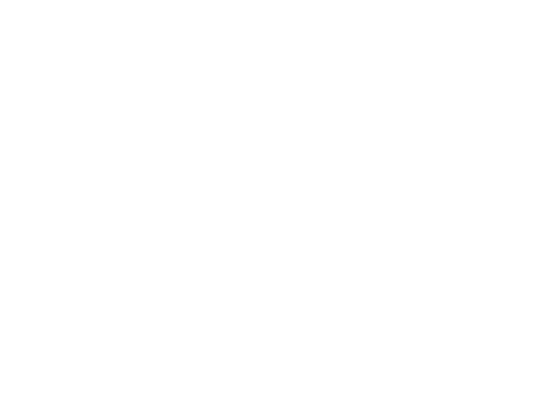

In [114]:
[img, map, alpha] = imread("stones_rgb.jpg");
imshow(img);
img = double(img);

In [115]:
h=size(img,1);
lambda = transpose([0.299 -0.14713 0.615; 0.587 -0.28886 -0.51499; 0.114 0.436 -0.10001]);
W = zeros(h*h,h*h);
r=2;
sig=10;

for x_i=1:h
    for y_i=1:h
        for x_j = (x_i-r):(x_i+r)
            for y_j = (y_i-r):(y_i+r)
                if( x_j>0 && x_j<=h && y_j>0 && y_j<=h)
                    i = x_i+h*(y_i-1);
                    j = x_j+h*(y_j-1);
                    if (i!=j) 
                        c_i = img(x_i, y_i)';
                        c_j = img(x_j, y_j)';
                        n = norm(lambda*(c_i-c_j),2);
                        sim = exp( -1 * (pow2(n)/(2*sig*sig)) );
                        W(i,j)=sim;
                    endif
                endif
            endfor
        endfor
    endfor
endfor

In [116]:
D = zeros(h*h, h*h);
for i= 1:h*h
    D(i,i)=sum(W(i,:)); 
endfor

In [117]:
L = sqrt(D)*W*sqrt(D);

In [118]:
ran = randn(h*h,h*h);
[Q, R] = qr(ran);
k=5;
Q = Q(:,1:5);

for i = 1:3000
    Z = L*Q;
    [Q,R]=qr(Z,0);
endfor

In [119]:
R(1:k, 1:k);
V = sqrt(D)*Q;

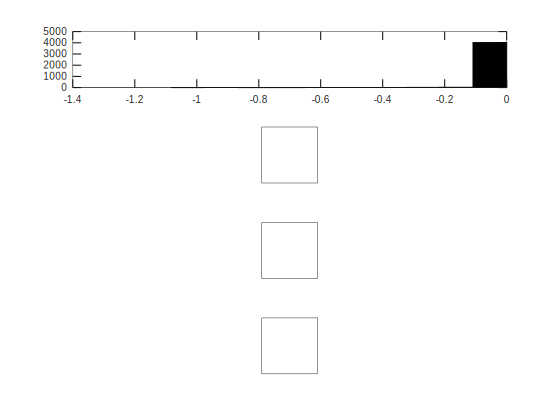

In [120]:
subplot (4, 1, 1)
hist(V(:,1));
subplot(4,1,2)
V_s = reshape(V(:,1), h, h);
imshow(V_s)
c1 = img;
c2 = img;
for i=1:h
    for j=1:h
        if(V_s(i,j)<0)
            c2(i,j) = 0;
        else
            c1(i,j) = 0;
        endif
    endfor
endfor

subplot(4,1,3)
imshow(uint8(c1))
subplot(4,1,4)
imshow(uint8(c2))


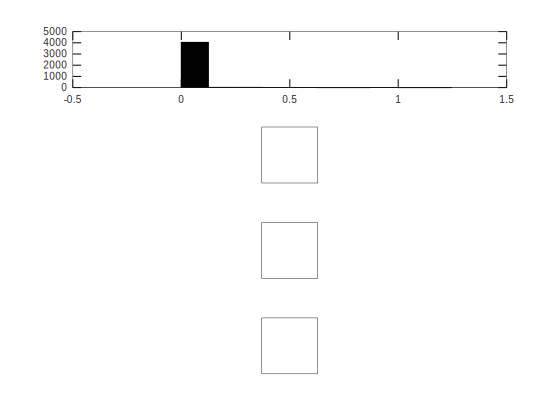

In [121]:
subplot (4, 1, 1)
hist(V(:,2));
subplot(4,1,2)
V_s = reshape(V(:,2), h, h);
imshow(V_s)
c1 = img;
c2 = img;
for i=1:h
    for j=1:h
        if(V_s(i,j)<0)
            c2(i,j) = 0;
        else
            c1(i,j) = 0;
        endif
    endfor
endfor

subplot(4,1,3)
imshow(uint8(c1))
subplot(4,1,4)
imshow(uint8(c2))

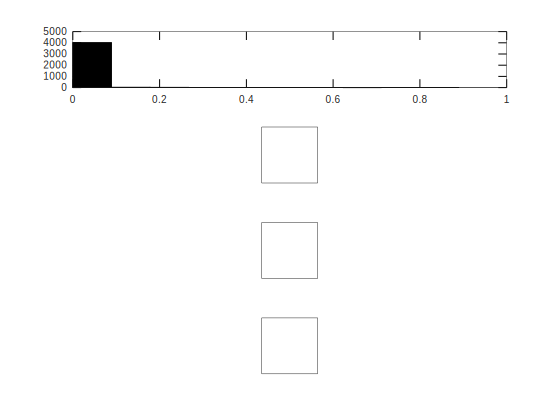

In [122]:
subplot (4, 1, 1)
hist(V(:,3));
subplot(4,1,2)
V_s = reshape(V(:,3), h, h);
imshow(V_s)
c1 = img;
c2 = img;
for i=1:h
    for j=1:h
        if(V_s(i,j)<0)
            c2(i,j) = 0;
        else
            c1(i,j) = 0;
        endif
    endfor
endfor

subplot(4,1,3)
imshow(uint8(c1))
subplot(4,1,4)
imshow(uint8(c2))

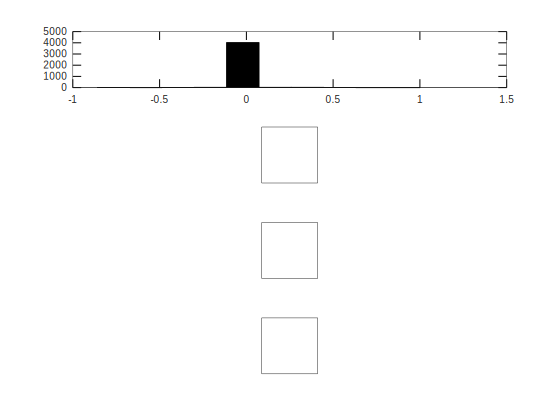

In [123]:
subplot (4, 1, 1)
hist(V(:,4));
subplot(4,1,2)
V_s = reshape(V(:,4), h, h);
imshow(V_s)
c1 = img;
c2 = img;
for i=1:h
    for j=1:h
        if(V_s(i,j)<0)
            c2(i,j) = 0;
        else
            c1(i,j) = 0;
        endif
    endfor
endfor

subplot(4,1,3)
imshow(uint8(c1))
subplot(4,1,4)
imshow(uint8(c2))

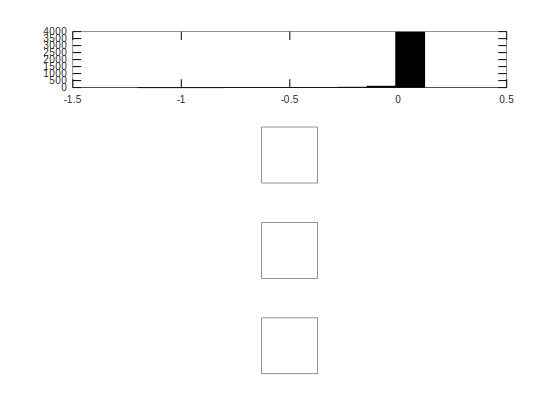

In [124]:
subplot (4, 1, 1)
hist(V(:,5));
subplot(4,1,2)
V_s = reshape(V(:,5), h, h);
imshow(V_s)
c1 = img;
c2 = img;
for i=1:h
    for j=1:h
        if(V_s(i,j)<0)
            c2(i,j) = 0;
        else
            c1(i,j) = 0;
        endif
    endfor
endfor

subplot(4,1,3)
imshow(uint8(c1))
subplot(4,1,4)
imshow(uint8(c2))